Work Flow:
Data --> Data Pre-processing --> Data Analysis --> Train Test split --> Logistic Regression Model --> Evaluation

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings 
warnings.filterwarnings("ignore")
%matplotlib inline

### Data Collection

In [2]:
# load the data from the csv file to a Pandas Dataframe
titanic = pd.read_csv("train.csv")
print(titanic.shape)
titanic.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Pre-processing

In [3]:
# getting some information from the data
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# Check the number of missing values in each column
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##### Handling the Missing values

In [5]:
# drop the 'cabin' column, since we will not use it
titanic = titanic.drop(columns='Cabin', axis=1)

In [6]:
# replacing the missing values in 'Age' column with mean values
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mean())

In [7]:
# finding the most occuring value in 'Embarked' ie the mode
titanic['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [8]:
# replacing the missing values in 'Embarked' with the mode 
titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])

In [9]:
# rechecking for missing values
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Data Analysis

In [10]:
# getting some statistical measures about the data
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
# finding the number of people who survived and those that didn't
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

##### Data Visualizations

In [12]:
sns.set()

<AxesSubplot:xlabel='Survived', ylabel='count'>

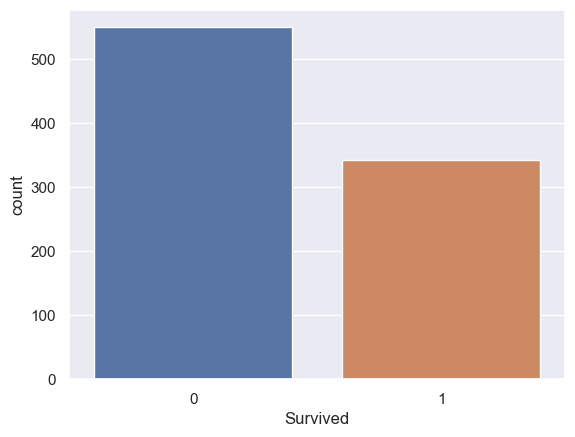

In [13]:
# making a countplot for 'Survived' column
sns.countplot("Survived", data=titanic)

In [14]:
# finding the gender of people who survived and those that didn't
titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

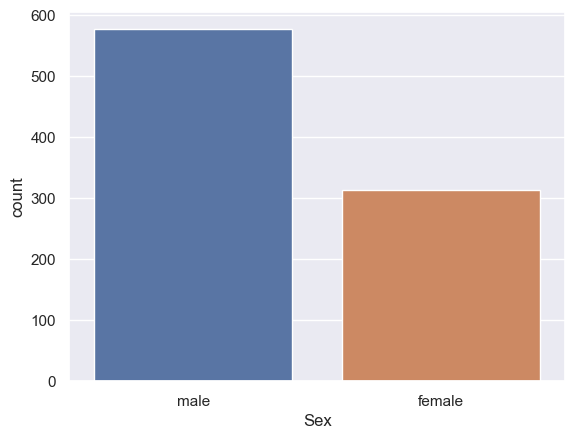

In [15]:
# making a countplot for 'Sex' column
sns.countplot("Sex", data=titanic)

<AxesSubplot:xlabel='Sex', ylabel='count'>

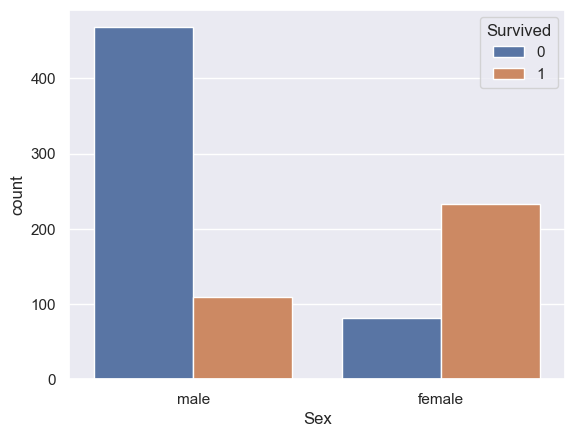

In [16]:
# comparing number of survivors based on gender
sns.countplot("Sex", hue="Survived", data=titanic)

In [17]:
titanic['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='count'>

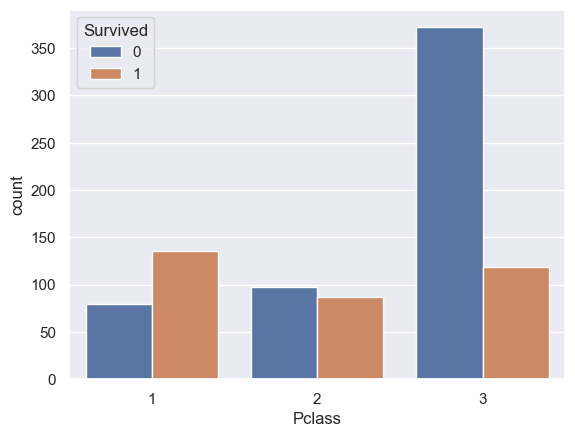

In [18]:
# comparing number of survivors based on passenger class
sns.countplot("Pclass", hue="Survived", data=titanic)

In [19]:
# checking the how many passengers who had either a spouse or sibling(s)
titanic['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

<AxesSubplot:xlabel='SibSp', ylabel='count'>

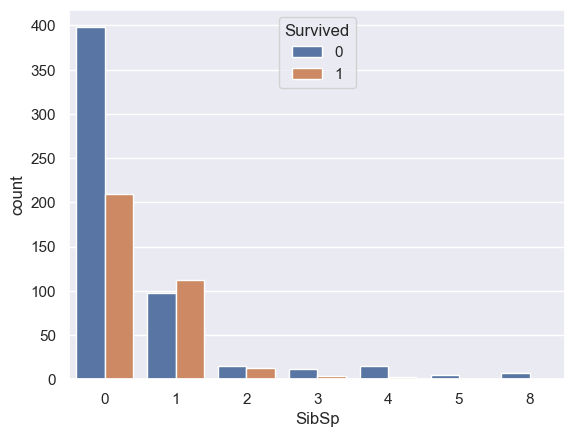

In [20]:
# comparing number of survivors based on number of spouses or siblings
sns.countplot("SibSp", hue="Survived", data=titanic)

In [21]:
# checking the how many passengers who had either parent(s) or children
titanic['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

<AxesSubplot:xlabel='Parch', ylabel='count'>

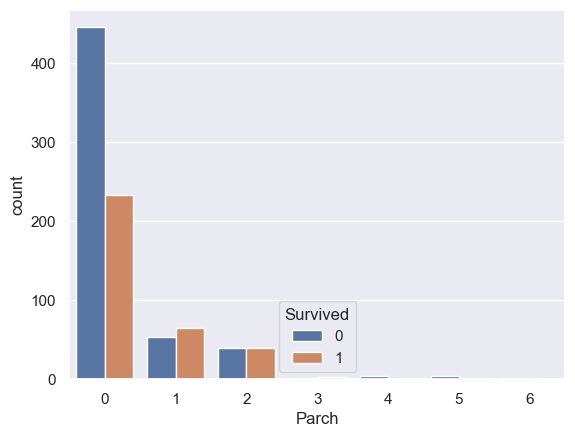

In [22]:
# comparing number of survivors based on number of parents or children
sns.countplot("Parch", hue="Survived", data=titanic)

In [23]:
# checking the information for places embarked from
titanic['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

<AxesSubplot:xlabel='Embarked', ylabel='count'>

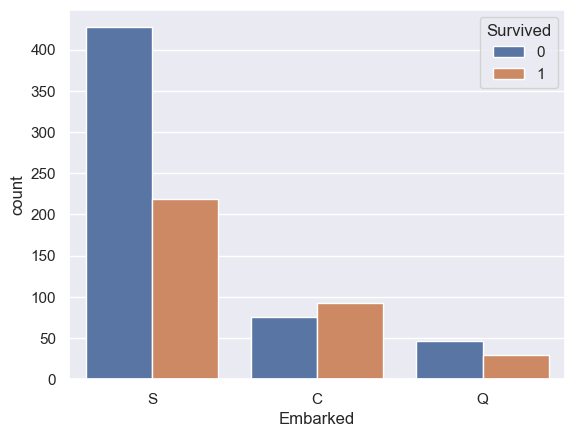

In [24]:
# comparing number of survivors based on embarked
sns.countplot("Embarked", hue="Survived", data=titanic)

##### Encoding categorical columns

In [27]:
# finding the gender of people who survived and those that didn't
titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [28]:
# checking the information for places embarked from
titanic['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [31]:
# converting categorical columns
titanic = titanic.replace({'Sex':{'male':0, 'female':1}, 'Embarked':{'S':0, 'C':1, 'Q':2}})

##### Separating features & Targets

In [34]:
# features as X; targets as y
X = titanic.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Fare'], axis=1)
y = titanic['Survived']

### Train Test Split

In [35]:
# Splitting the data into training data and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [36]:
print(X.shape, X_train.shape, X_test.shape)

(891, 6) (712, 6) (179, 6)


### Model Training

In [37]:
# load the model
model = LogisticRegression()

In [38]:
# training the logistic regression model with training data
model.fit(X_train, y_train)

LogisticRegression()

### Model Evaluation

##### Accuracy Score

In [40]:
# make predictions on training data
predictions_train = model.predict(X_train)

# accuracy score on training data
accuracy_train = accuracy_score(y_train, predictions_train)
print(f"Accuracy score of our model on training data: {accuracy_train*100}")

Accuracy score of our model on training data: 81.17977528089888


In [41]:
# make predictions on testing data
predictions_test = model.predict(X_test)

# accuracy score on training data
accuracy_test = accuracy_score(y_test, predictions_test)
print(f"Accuracy score of our model on test data: {accuracy_test*100}")

Accuracy score of our model on test data: 78.77094972067039


##### using confusion matrix

In [43]:
# using confusion matrix on training data
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, predictions_train)

array([[391,  58],
       [ 76, 187]], dtype=int64)

In [44]:
# using confusion matrix on testing data
confusion_matrix(y_test, predictions_test)

array([[91,  9],
       [29, 50]], dtype=int64)